<a href="https://colab.research.google.com/github/dougfeltrim/Bootcamp_Data_Science_Aplicada/blob/main/Bootcamp_Data_Science_Aplicada_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", engine='python', encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [3]:
dados.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [5]:
pd.options.display.float_format = "{:.2f}".format

In [6]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [7]:
dados['2008/Ago'].mean()

26636409.892222222

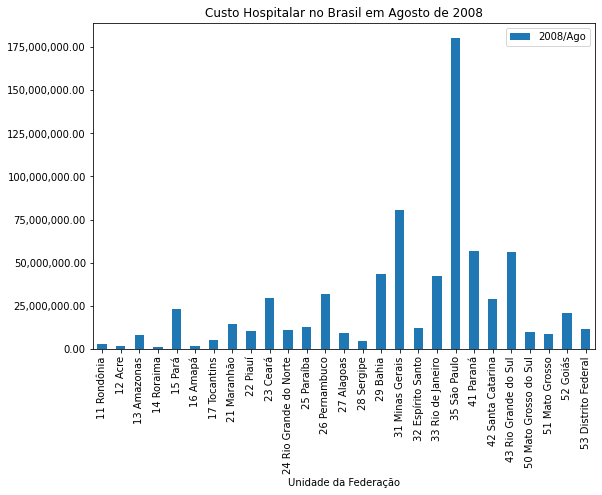

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x='Unidade da Federação' , y='2008/Ago', kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Custo Hospitalar no Brasil em Agosto de 2008")

plt.show() 

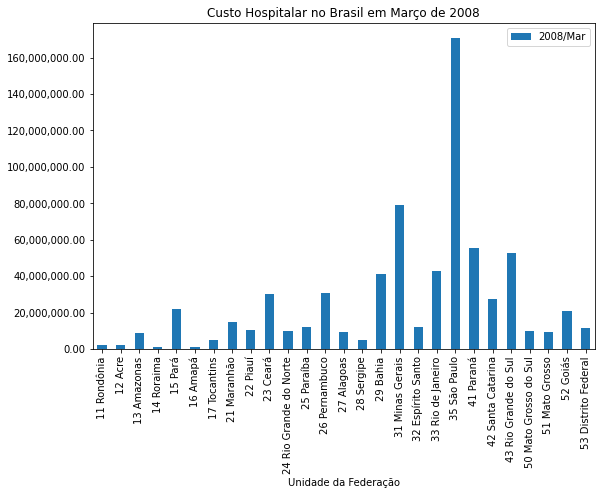

In [9]:
ax = dados.plot(x='Unidade da Federação' , y='2008/Mar', kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Custo Hospitalar no Brasil em Março de 2008")

plt.show() 



In [10]:
diferenca = dados['2009/Mar'].mean() - dados['2008/Ago'].mean()
print('%.2f' %  diferenca)

5743453.69


In [11]:
# dados[['2008/Mar','2021/Mar']]

In [12]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [13]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [14]:
usaveis = usaveis.set_index(['Unidade da Federação'])

usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [15]:
usaveis['2019/Ago'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [16]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

In [17]:
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [18]:
usaveis = usaveis.drop("Total", axis = 1)

In [19]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


Text(0.5, 1.0, 'Custo Hospitalar do SUS no Brasil ')

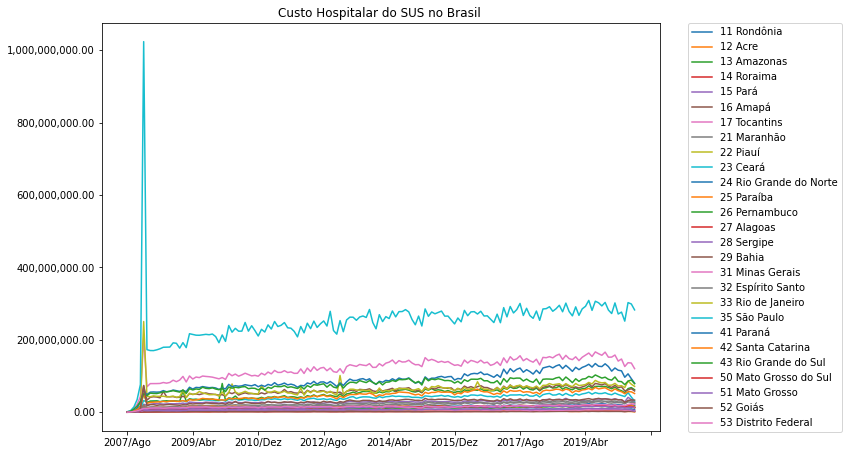

In [20]:
ax = usaveis.T.plot(figsize= (10,7.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Custo Hospitalar do SUS no Brasil ")

In [21]:
usaveis2 = usaveis.T.head()
# usaveis2.columns
cinco_estados = usaveis2[["31 Minas Gerais","35 São Paulo", "32 Espírito Santo", "33 Rio de Janeiro", "12 Acre"]]


Text(0.5, 1.0, 'Custo do SUS - Sudeste x Acre')

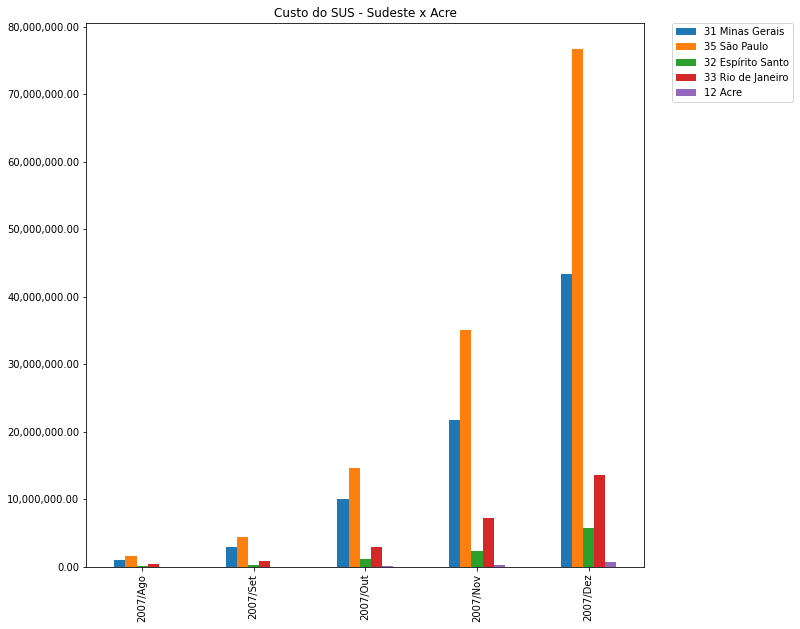

In [22]:
ax = cinco_estados.plot(kind = "bar", figsize= (10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Custo do SUS - Sudeste x Acre")

In [23]:
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [24]:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

Text(0.5, 1.0, '5 Estados com maiores gastos do SUS ')

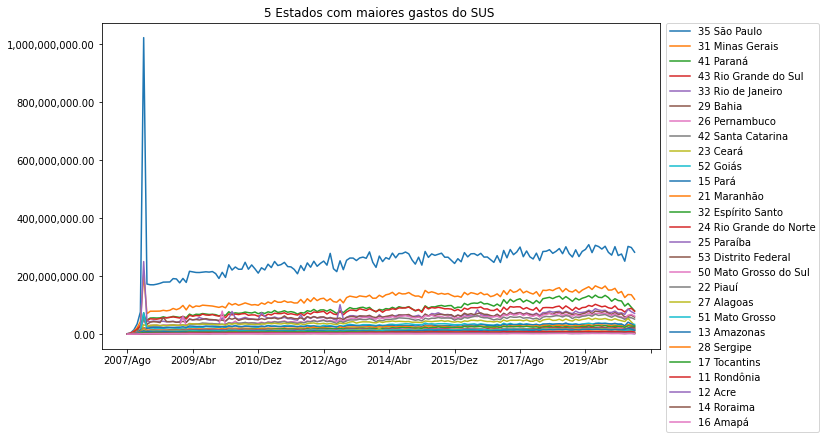

In [25]:
ax = ordenado_por_total.T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("5 Estados com maiores gastos do SUS ")

In [26]:
colunas_interessadas = ordenado_por_total.columns[6:]

ordenado_por_total = ordenado_por_total[colunas_interessadas]

Text(0.5, 1.0, '5 Estados com maiores gastos do SUS ')

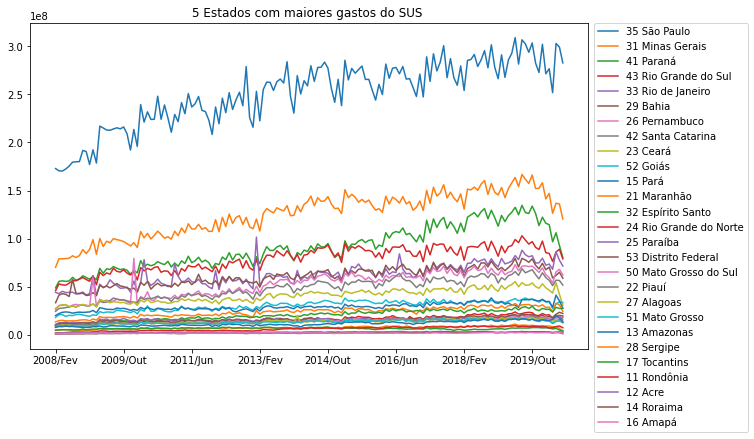

In [27]:
 ordenado_por_total.T.plot(figsize=(10,6))
 plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("5 Estados com maiores gastos do SUS ")

In [28]:
estados = usaveis.T.columns



numeros = []
num = []

norte = []
nordeste = []
sudeste = [] 
sul = []
centro = []
# separando as regioes do Brasil
for i in estados:
  num = int(i.split()[0])
  numeros.append(int(num))
  # print(i.split()[0])
  # print(num)
  if num >= 11 and num <= 17:
    print('Norte')
    print(i)
    norte.append(i)
  elif num >= 21 and num <= 29:
    print('Nordeste')
    print(i)
    nordeste.append(i)
  elif num >= 31 and num <= 35:
    print('Sudeste')
    print(i)
    sudeste.append(i)
  elif num >= 41 and num <= 43:
    print('Sul')
    print(i)
    sul.append(i)
  elif num >= 50 and num <= 53:
    print('Centro Oeste')
    print(i)
    centro.append(i)





Norte
11 Rondônia
Norte
12 Acre
Norte
13 Amazonas
Norte
14 Roraima
Norte
15 Pará
Norte
16 Amapá
Norte
17 Tocantins
Nordeste
21 Maranhão
Nordeste
22 Piauí
Nordeste
23 Ceará
Nordeste
24 Rio Grande do Norte
Nordeste
25 Paraíba
Nordeste
26 Pernambuco
Nordeste
27 Alagoas
Nordeste
28 Sergipe
Nordeste
29 Bahia
Sudeste
31 Minas Gerais
Sudeste
32 Espírito Santo
Sudeste
33 Rio de Janeiro
Sudeste
35 São Paulo
Sul
41 Paraná
Sul
42 Santa Catarina
Sul
43 Rio Grande do Sul
Centro Oeste
50 Mato Grosso do Sul
Centro Oeste
51 Mato Grosso
Centro Oeste
52 Goiás
Centro Oeste
53 Distrito Federal


In [29]:
usaveis['Regioes'] = 'NaN'
# adicionando a coluna de regioes
print(nordeste)

['21 Maranhão', '22 Piauí', '23 Ceará', '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas', '28 Sergipe', '29 Bahia']


In [30]:
ordenado_por_total = ordenado_por_total / 1000000

Text(0.5, 1.0, '5 Estados com maiores gastos do SUS ')

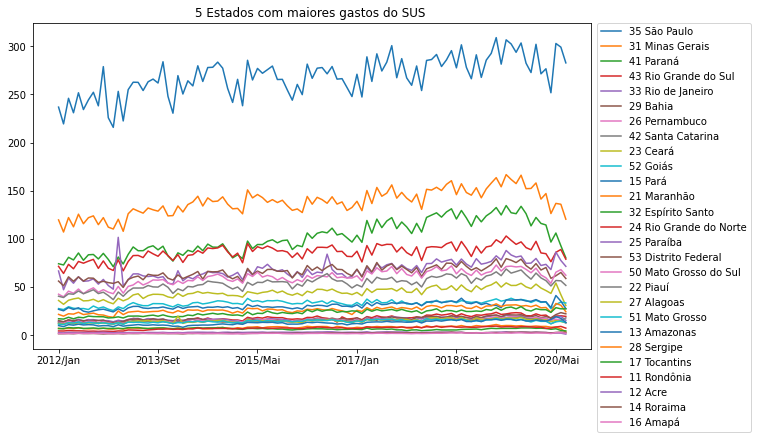

In [31]:
meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("5 Estados com maiores gastos do SUS ")

(0.0, 400.0)

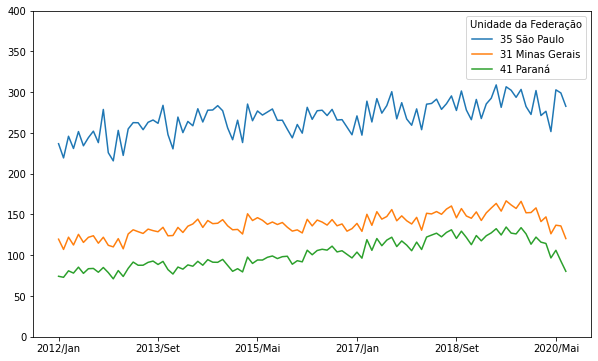

In [32]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,400)

In [33]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [34]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]

In [46]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

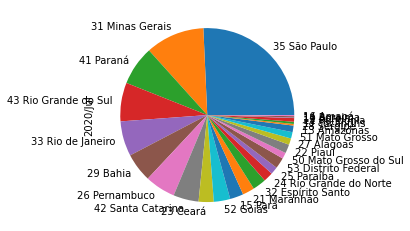

In [36]:
gastos_do_mais_recente.plot(kind='pie')

In [37]:

gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

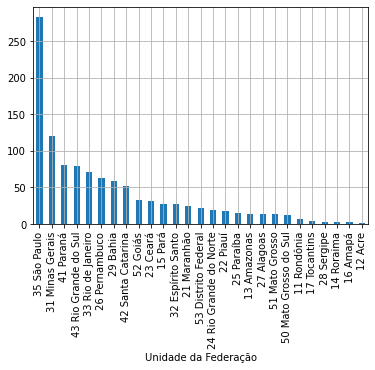

In [38]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', grid='bool')

**Inicio do módulo 2**

In [39]:
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [40]:
gastos_proporcionais_por_estado = gastos_do_mais_recente / gastos_do_mais_recente.sum()

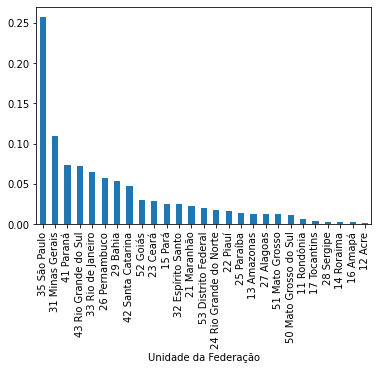

In [41]:
gastos_proporcionais_por_estado.plot(kind='bar')

In [42]:
ibge_estimativa = pd.read_excel('https://github.com/dougfeltrim/Bootcamp_Data_Science_Aplicada/blob/main/dados/POP2020_20210331.xls?raw=true')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [43]:
dados_da_populacao = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [44]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao = populacao.dropna()

populacao['populacao'] = populacao["População"].str.replace(' ', '').astype(int)
populacao['uf'] = populacao['Unidade federativa']
populacao = populacao[['populacao', 'uf']].set_index('uf')
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [50]:
populacao.index = populacao.index.str.strip()

In [51]:
populacao.join(gastos_do_mais_recente)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia Bahia,14930634,nan
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará Pará,8690745,nan


In [53]:
for estado in gastos_do_mais_recente.index:
  print(f'{estado} {estado} => {estado}')
  populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

São Paulo São Paulo => São Paulo
Minas Gerais Minas Gerais => Minas Gerais
Paraná Paraná => Paraná
Rio Grande do Sul Rio Grande do Sul => Rio Grande do Sul
Rio de Janeiro Rio de Janeiro => Rio de Janeiro
Pernambuco Pernambuco => Pernambuco
Bahia Bahia => Bahia
Santa Catarina Santa Catarina => Santa Catarina
Goiás Goiás => Goiás
Ceará Ceará => Ceará
Pará Pará => Pará
Espírito Santo Espírito Santo => Espírito Santo
Maranhão Maranhão => Maranhão
Distrito Federal Distrito Federal => Distrito Federal
Rio Grande do Norte Rio Grande do Norte => Rio Grande do Norte
Piauí Piauí => Piauí
Paraíba Paraíba => Paraíba
Amazonas Amazonas => Amazonas
Alagoas Alagoas => Alagoas
Mato Grosso Mato Grosso => Mato Grosso
Mato Grosso do Sul Mato Grosso do Sul => Mato Grosso do Sul
Rondônia Rondônia => Rondônia
Tocantins Tocantins => Tocantins
Sergipe Sergipe => Sergipe
Roraima Roraima => Roraima
Amapá Amapá => Amapá
Acre Acre => Acre


In [54]:
populacao.join(gastos_do_mais_recente)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


In [55]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
